In [1]:
import math
import numpy as np 

In [2]:
# 创建数据集 备注 李航《统计学习方法》中表5.1 贷款申请数据数据
def createDataLH():
    data = np.array([['青年', '否', '否', '一般']])
    data = np.append(data, [['青年', '否', '否', '好']], axis = 0)
    data = np.append(data, [['青年', '是', '否', '好'] 
                            , ['青年', '是', '是', '一般']
                            , ['青年', '否', '否', '一般']
                            , ['中年', '否', '否', '一般']
                            , ['中年', '否', '否', '好']
                            , ['中年', '是', '是', '好']
                            , ['中年', '否', '是', '非常好']
                            , ['中年', '否', '是', '非常好']
                            , ['老年', '否', '是', '非常好']
                            , ['老年', '否', '是', '好']
                            , ['老年', '是', '否', '好']
                            , ['老年', '是', '否', '非常好']
                            , ['老年', '否', '否', '一般']
                           ], axis = 0)
    label = np.array(['否', '否', '是', '是', '否', '否', '否', '是', '是', '是', '是', '是', '是', '是', '否'])
    name = np.array(['年龄', '有工作', '有房子', '信贷情况'])
    return data, label, name

# 创建西瓜书数据集2.0
def createDataXG20():
    data = np.array([['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑']
                    , ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑']
                    , ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑']
                    , ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑']
                    , ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑']
                    , ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘']
                    , ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘']
                    , ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑']
                    , ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑']
                    , ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘']
                    , ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑']
                    , ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘']
                    , ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑']
                    , ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑']
                    , ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘']
                    , ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑']
                    , ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑']])
    label = np.array(['是', '是', '是', '是', '是', '是', '是', '是', '否', '否', '否', '否', '否', '否', '否', '否', '否'])
    name = np.array(['色泽', '根蒂', '敲声', '纹理', '脐部', '触感'])
    return data, label, name

def splitXgData20(xgData, xgLabel):
    xgDataTrain = xgData[[0, 1, 2, 5, 6, 9, 13, 14, 15, 16],:]
    xgDataTest = xgData[[3, 4, 7, 8, 10, 11, 12],:]
    xgLabelTrain = xgLabel[[0, 1, 2, 5, 6, 9, 13, 14, 15, 16]]
    xgLabelTest = xgLabel[[3, 4, 7, 8, 10, 11, 12]]
    return xgDataTrain, xgLabelTrain, xgDataTest, xgLabelTest

In [3]:
# 特征选取
def bestFeature(data, labels, method = 'id3'):
    assert method in ['id3', 'c45'], "method 须为id3或c45"
    data = np.asarray(data)
    labels = np.asarray(labels)
    # 根据输入的method选取 评估特征的方法：id3 -> 信息增益; c45 -> 信息增益率
    def calcEnt(feature, labels):
        if method == 'id3':
            return infoGain(feature, labels)
        elif method == 'c45' :
            return infoGainRatio(feature, labels)
    # 特征数量  即 data 的列数量
    featureNum = data.shape[1]
    # 计算最佳特征
    bestEnt = 0 
    bestFeat = -1
    for feature in range(featureNum):
        ent = calcEnt(data[:, feature], labels)
        if ent >= bestEnt:
            bestEnt = ent 
            bestFeat = feature
        # print("feature " + str(feature + 1) + " ent: " + str(ent)+ "\t bestEnt: " + str(bestEnt))
    return bestFeat, bestEnt 


# 根据特征及特征值分割原数据集  删除data中的feature列，并根据feature列中的值分割 data和label
def splitFeatureData(data, labels, feature):
    """feature 为特征列的索引"""
    # 取特征列
    features = np.asarray(data)[:,feature]
    # 数据集中删除特征列
    data = np.delete(np.asarray(data), feature, axis = 1)
    # 标签
    labels = np.asarray(labels)
    
    uniqFeatures = set(features)
    dataSet = {}
    labelSet = {}
    for feat in uniqFeatures:
        dataSet[feat] = data[features == feat]
        labelSet[feat] = labels[features == feat]
    return dataSet, labelSet
    
    
# 多数投票 
def voteLabel(labels):
    uniqLabels = list(set(labels))
    labels = np.asarray(labels)

    finalLabel = 0
    labelNum = []
    for label in uniqLabels:
        # 统计每个标签值得数量
        labelNum.append(equalNums(labels, label))
    # 返回数量最大的标签
    return uniqLabels[labelNum.index(max(labelNum))]


# 创建决策树
def createTree(data, labels, names, method = 'id3'):
    data = np.asarray(data)
    labels = np.asarray(labels)
    names = np.asarray(names)
    # 如果结果为单一结果
    if len(set(labels)) == 1: 
        return labels[0] 
    # 如果没有待分类特征
    elif data.size == 0: 
        return voteLabel(labels)
    # 其他情况则选取特征 
    bestFeat, bestEnt = bestFeature(data, labels, method = method)
    # 取特征名称
    bestFeatName = names[bestFeat]
    # 从特征名称列表删除已取得特征名称
    names = np.delete(names, [bestFeat])
    # 根据选取的特征名称创建树节点
    decisionTree = {bestFeatName: {}}
    # 根据最优特征进行分割
    dataSet, labelSet = splitFeatureData(data, labels, bestFeat)
    # 对最优特征的每个特征值所分的数据子集进行计算
    for featValue in dataSet.keys():
        decisionTree[bestFeatName][featValue] = createTree(dataSet.get(featValue), labelSet.get(featValue), names, method)
    return decisionTree 


# 树信息统计 叶子节点数量 和 树深度
def getTreeSize(decisionTree):
    nodeName = list(decisionTree.keys())[0]
    nodeValue = decisionTree[nodeName]
    leafNum = 0
    treeDepth = 0 
    leafDepth = 0
    for val in nodeValue.keys():
        if type(nodeValue[val]) == dict:
            leafNum += getTreeSize(nodeValue[val])[0]
            leafDepth = 1 + getTreeSize(nodeValue[val])[1] 
        else :
            leafNum += 1 
            leafDepth = 1 
        treeDepth = max(treeDepth, leafDepth)
    return leafNum, treeDepth 


# 使用模型对其他数据分类
def dtClassify(decisionTree, rowData, names):
    names = list(names)
    # 获取特征
    feature = list(decisionTree.keys())[0]
    # 决策树对于该特征的值的判断字段
    featDict = decisionTree[feature]
    # 获取特征的列
    feat = names.index(feature)
    # 获取数据该特征的值
    featVal = rowData[feat]
    # 根据特征值查找结果，如果结果是字典说明是子树，调用本函数递归
    if featVal in featDict.keys():
        if type(featDict[featVal]) == dict:
            classLabel = dtClassify(featDict[featVal], rowData, names)
        else:
            classLabel = featDict[featVal] 
    return classLabel


In [9]:
# 可视化 主要源自《机器学习实战》
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'


decisionNodeStyle = dict(boxstyle = "sawtooth", fc = "0.8")
leafNodeStyle = {"boxstyle": "round4", "fc": "0.8"}
arrowArgs = {"arrowstyle": "<-"}


# 画节点
def plotNode(nodeText, centerPt, parentPt, nodeStyle):
    createPlot.ax1.annotate(nodeText, xy = parentPt, xycoords = "axes fraction", xytext = centerPt
                            , textcoords = "axes fraction", va = "center", ha="center", bbox = nodeStyle, arrowprops = arrowArgs)


# 添加箭头上的标注文字
def plotMidText(centerPt, parentPt, lineText):
    xMid = (centerPt[0] + parentPt[0]) / 2.0
    yMid = (centerPt[1] + parentPt[1]) / 2.0 
    createPlot.ax1.text(xMid, yMid, lineText)
    
    
# 画树
def plotTree(decisionTree, parentPt, parentValue):
    # 计算宽与高
    leafNum, treeDepth = getTreeSize(decisionTree) 
    # 在 1 * 1 的范围内画图，因此分母为 1
    # 每个叶节点之间的偏移量
    plotTree.xOff = plotTree.figSize / (plotTree.totalLeaf - 1)
    # 每一层的高度偏移量
    plotTree.yOff = plotTree.figSize / plotTree.totalDepth
    # 节点名称
    nodeName = list(decisionTree.keys())[0]
    # 根节点的起止点相同，可避免画线；如果是中间节点，则从当前叶节点的位置开始，
    #      然后加上本次子树的宽度的一半，则为决策节点的横向位置
    centerPt = (plotTree.x + (leafNum - 1) * plotTree.xOff / 2.0, plotTree.y)
    # 画出该决策节点
    plotNode(nodeName, centerPt, parentPt, decisionNodeStyle)
    # 标记本节点对应父节点的属性值
    plotMidText(centerPt, parentPt, parentValue)
    # 取本节点的属性值
    treeValue = decisionTree[nodeName]
    # 下一层各节点的高度
    plotTree.y = plotTree.y - plotTree.yOff
    # 绘制下一层
    for val in treeValue.keys():
        # 如果属性值对应的是字典，说明是子树，进行递归调用； 否则则为叶子节点
        if type(treeValue[val]) == dict:
            plotTree(treeValue[val], centerPt, str(val))
        else:
            plotNode(treeValue[val], (plotTree.x, plotTree.y), centerPt, leafNodeStyle)
            plotMidText((plotTree.x, plotTree.y), centerPt, str(val))
            # 移到下一个叶子节点
            plotTree.x = plotTree.x + plotTree.xOff
    # 递归完成后返回上一层
    plotTree.y = plotTree.y + plotTree.yOff
    
    
# 画出决策树
def createPlot(decisionTree):
    fig = plt.figure(1, facecolor = "white")
    fig.clf()
    axprops = {"xticks": [], "yticks": []}
    createPlot.ax1 = plt.subplot(111, frameon = False, **axprops)
    # 定义画图的图形尺寸
    plotTree.figSize = 1.5 
    # 初始化树的总大小
    plotTree.totalLeaf, plotTree.totalDepth = getTreeSize(decisionTree)
    # 叶子节点的初始位置x 和 根节点的初始层高度y
    plotTree.x = 0 
    plotTree.y = plotTree.figSize
    plotTree(decisionTree, (plotTree.figSize / 2.0, plotTree.y), "")
    plt.show()


{'有房子': {'是': '是', '否': {'有工作': {'是': '是', '否': '否'}}}}


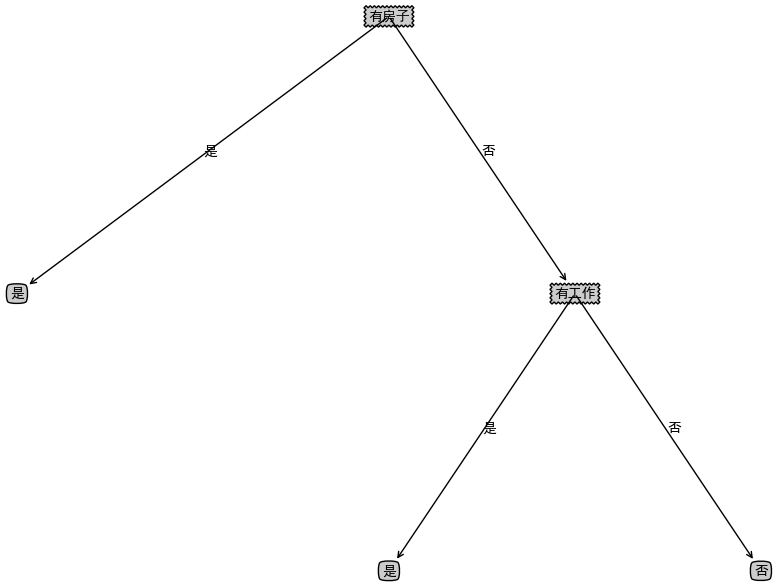

In [10]:
# 使用李航数据测试函数 p62
lhData, lhLabel, lhName = createDataLH()
lhTree = createTree(lhData, lhLabel, lhName, method = 'id3')
print(lhTree)
createPlot(lhTree)

In [6]:
# 定义一个常用函数 用来求numpy array中数值等于某值的元素数量
equalNums = lambda x,y: 0 if x is None else x[x==y].size


# 定义计算信息熵的函数
def singleEntropy(x):
    """计算一个输入序列的信息熵"""
    # 转换为 numpy 矩阵
    x = np.asarray(x)
    # 取所有不同值
    xValues = set(x)
    # 计算熵值
    entropy = 0
    for xValue in xValues:
        p = equalNums(x, xValue) / x.size 
        entropy -= p * math.log(p, 2)
    return entropy
    
    
# 定义计算条件信息熵的函数
def conditionnalEntropy(feature, y):
    """计算 某特征feature 条件下y的信息熵"""
    # 转换为numpy 
    feature = np.asarray(feature)
    y = np.asarray(y)
    # 取特征的不同值
    featureValues = set(feature)
    # 计算熵值 
    entropy = 0
    for feat in featureValues:
        # 解释：feature == feat 是得到取feature中所有元素值等于feat的元素的索引（类似这样理解）
        #       y[feature == feat] 是取y中 feature元素值等于feat的元素索引的 y的元素的子集
        p = equalNums(feature, feat) / feature.size 
        entropy += p * singleEntropy(y[feature == feat])
    return entropy
    
    
# 定义信息增益
def infoGain(feature, y):
    return singleEntropy(y) - conditionnalEntropy(feature, y)


# 定义信息增益率
def infoGainRatio(feature, y):
    return 0 if singleEntropy(feature) == 0 else infoGain(feature, y) / singleEntropy(feature)


In [11]:
# 创建决策树 带预划分标签
def createTreeWithLabel(data, labels, names, method = 'id3'):
    data = np.asarray(data)
    labels = np.asarray(labels)
    names = np.asarray(names)
    # 如果不划分的标签为
    votedLabel = voteLabel(labels)
    # 如果结果为单一结果
    if len(set(labels)) == 1: 
        return votedLabel 
    # 如果没有待分类特征
    elif data.size == 0: 
        return votedLabel
    # 其他情况则选取特征 
    bestFeat, bestEnt = bestFeature(data, labels, method = method)
    # 取特征名称
    bestFeatName = names[bestFeat]
    # 从特征名称列表删除已取得特征名称
    names = np.delete(names, [bestFeat])
    # 根据选取的特征名称创建树节点 划分前的标签votedPreDivisionLabel=_vpdl
    decisionTree = {bestFeatName: {"_vpdl": votedLabel}}
    # 根据最优特征进行分割
    dataSet, labelSet = splitFeatureData(data, labels, bestFeat)
    # 对最优特征的每个特征值所分的数据子集进行计算
    for featValue in dataSet.keys():
        decisionTree[bestFeatName][featValue] = createTreeWithLabel(dataSet.get(featValue), labelSet.get(featValue), names, method)
    return decisionTree 


# 将带预划分标签的tree转化为常规的tree
# 函数中进行的copy操作，原因见有道笔记 【YL20190621】关于Python中字典存储修改的思考
def convertTree(labeledTree):
    labeledTreeNew = labeledTree.copy()
    nodeName = list(labeledTree.keys())[0]
    labeledTreeNew[nodeName] = labeledTree[nodeName].copy()
    for val in list(labeledTree[nodeName].keys()):
        if val == "_vpdl": 
            labeledTreeNew[nodeName].pop(val)
        elif type(labeledTree[nodeName][val]) == dict:
            labeledTreeNew[nodeName][val] = convertTree(labeledTree[nodeName][val])
    return labeledTreeNew


# 后剪枝 训练完成后决策节点进行替换评估  这里可以直接对xgTreeTrain进行操作
def treePostPruning(labeledTree, dataTest, labelTest, names):
    newTree = labeledTree.copy()
    dataTest = np.asarray(dataTest)
    labelTest = np.asarray(labelTest)
    names = np.asarray(names)
    # 取决策节点的名称 即特征的名称
    featName = list(labeledTree.keys())[0]
    # print("\n当前节点：" + featName)
    # 取特征的列
    featCol = np.argwhere(names==featName)[0][0]
    names = np.delete(names, [featCol])
    # print("当前节点划分的数据维度：" + str(names))
    # print("当前节点划分的数据：" )
    # print(dataTest)
    # print(labelTest)
    # 该特征下所有值的字典
    newTree[featName] = labeledTree[featName].copy()
    featValueDict = newTree[featName]
    featPreLabel = featValueDict.pop("_vpdl")
    # print("当前节点预划分标签：" + featPreLabel)
    # 是否为子树的标记
    subTreeFlag = 0
    # 分割测试数据 如果有数据 则进行测试或递归调用  np的array我不知道怎么判断是否None, 用is None是错的
    dataFlag = 1 if sum(dataTest.shape) > 0 else 0
    if dataFlag == 1:
        # print("当前节点有划分数据！")
        dataTestSet, labelTestSet = splitFeatureData(dataTest, labelTest, featCol)
    for featValue in featValueDict.keys():
        # print("当前节点属性 {0} 的子节点：{1}".format(featValue ,str(featValueDict[featValue])))
        if dataFlag == 1 and type(featValueDict[featValue]) == dict:
            subTreeFlag = 1 
            # 如果是子树则递归
            newTree[featName][featValue] = treePostPruning(featValueDict[featValue], dataTestSet.get(featValue), labelTestSet.get(featValue), names)
            # 如果递归后为叶子 则后续进行评估
            if type(featValueDict[featValue]) != dict:
                subTreeFlag = 0 
            
        # 如果没有数据  则转换子树
        if dataFlag == 0 and type(featValueDict[featValue]) == dict: 
            subTreeFlag = 1 
            # print("当前节点无划分数据！直接转换树："+str(featValueDict[featValue]))
            newTree[featName][featValue] = convertTree(featValueDict[featValue])
            # print("转换结果：" + str(convertTree(featValueDict[featValue])))
    # 如果全为叶子节点， 评估需要划分前的标签，这里思考两种方法，
    #     一是，不改变原来的训练函数，评估时使用训练数据对划分前的节点标签重新打标
    #     二是，改进训练函数，在训练的同时为每个节点增加划分前的标签，这样可以保证评估时只使用测试数据，避免再次使用大量的训练数据
    #     这里考虑第二种方法 写新的函数 createTreeWithLabel，当然也可以修改createTree来添加参数实现
    if subTreeFlag == 0:
        ratioPreDivision = equalNums(labelTest, featPreLabel) / labelTest.size
        equalNum = 0
        for val in labelTestSet.keys():
            equalNum += equalNums(labelTestSet[val], featValueDict[val])
        ratioAfterDivision = equalNum / labelTest.size 
        # print("当前节点预划分标签的准确率：" + str(ratioPreDivision))
        # print("当前节点划分后的准确率：" + str(ratioAfterDivision))
        # 如果划分后的测试数据准确率低于划分前的，则划分无效，进行剪枝，即使节点等于预划分标签
        # 注意这里取的是小于，如果有需要 也可以取 小于等于
        if ratioAfterDivision < ratioPreDivision:
            newTree = featPreLabel 
    return newTree


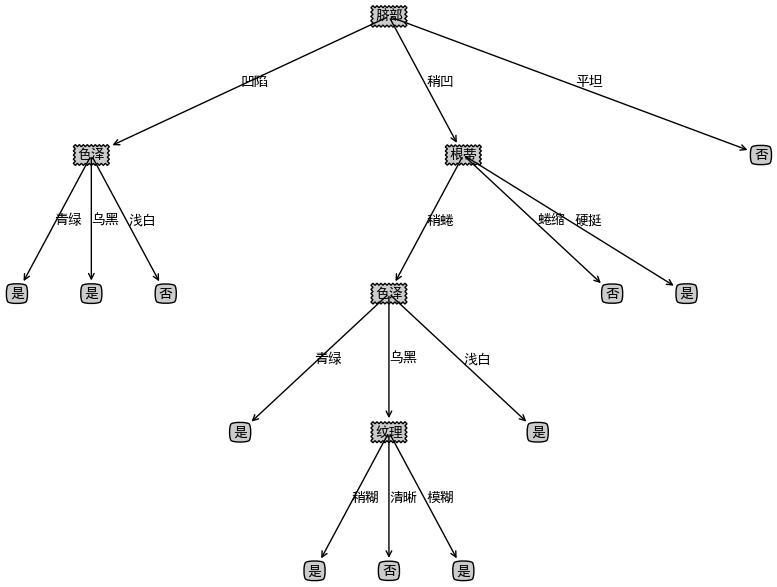

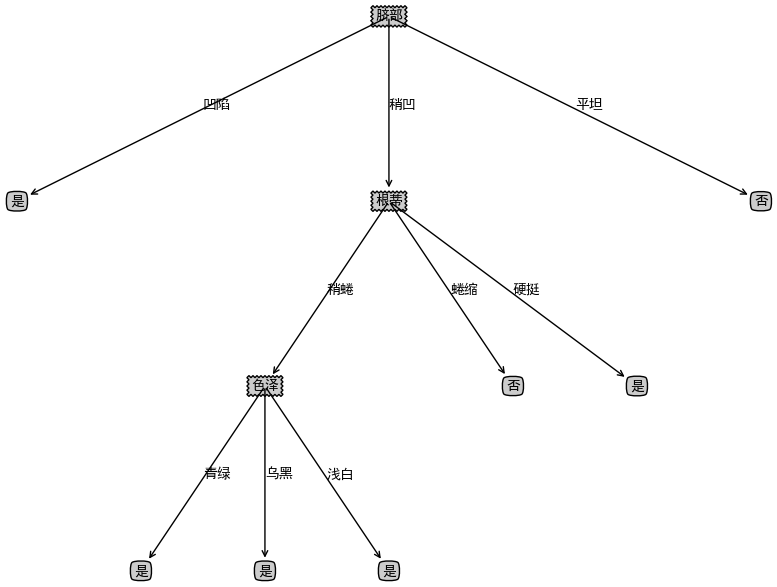

In [14]:
# 书中的树结构 p81 p83
xgData, xgLabel, xgName = createDataXG20()
xgDataTrain, xgLabelTrain, xgDataTest, xgLabelTest = splitXgData20(xgData, xgLabel)
xgTreeBeforePostPruning = {"脐部": {"_vpdl": "是"
                                   , '凹陷': {'色泽':{"_vpdl": "是", '青绿': '是', '乌黑': '是', '浅白': '否'}}
                                   , '稍凹': {'根蒂':{"_vpdl": "是"
                                                  , '稍蜷': {'色泽': {"_vpdl": "是"
                                                                  , '青绿': '是'
                                                                  , '乌黑': {'纹理': {"_vpdl": "是"
                                                                               , '稍糊': '是', '清晰': '否', '模糊': '是'}}
                                                                  , '浅白': '是'}}
                                                  , '蜷缩': '否'
                                                  , '硬挺': '是'}}
                                   , '平坦': '否'}}
xgTreePostPruning = treePostPruning(xgTreeBeforePostPruning, xgDataTest, xgLabelTest, xgName)
createPlot(convertTree(xgTreeBeforePostPruning))
createPlot(xgTreePostPruning)